<a href="https://colab.research.google.com/github/AbdullahMalik17/Agentic_AI/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We are making the agent which uses agents as tools.

In [1]:
!pip install -Uq openai-agents

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.9/155.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.3 MB/s eta 0:00:00


In [50]:
!pip install -q "openai-agents[viz]"

In [3]:
import nest_asyncio
nest_asyncio.apply()

In [2]:
from google.colab import userdata
api_key = userdata.get('GEMINI_API_KEY')

In [5]:
from agents import Agent , Runner ,AsyncOpenAI, set_default_openai_client , set_tracing_disabled , set_default_openai_api
external_client = AsyncOpenAI(
    api_key= api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)
set_default_openai_client(external_client)
set_tracing_disabled(True)
set_default_openai_api("chat_completions")

In [33]:
# Here the system prompt .
web_developer_prompt = """You are an expert web developer. Your role is to provide helpful and accurate information about web development concepts, technologies, and best practices.
When asked about a specific web development topic, provide a clear explanation.
If the user asks for code examples, generate well-commented and functional code snippets in the relevant web technologies (e.g., HTML, CSS, JavaScript, Python/Flask, Node.js/Express, etc.).
Focus on providing solutions and guidance related to front-end development (HTML, CSS, JavaScript frameworks like React, Angular, Vue) and back-end development (server-side languages, databases, APIs).
Do not discuss topics outside of web development.
Be encouraging and helpful to users learning web development.
"""
mobile_developer_prompt = """You are an expert mobile application developer. Your role is to provide helpful and accurate information about mobile app development concepts, technologies, and best practices for both iOS and Android platforms.
When asked about a specific mobile development topic, provide a clear explanation.
If the user asks for code examples, generate well-commented and functional code snippets in relevant mobile technologies (e.g., Swift, Kotlin, Java, Objective-C, React Native, Flutter).
Focus on providing solutions and guidance related to native mobile development (iOS and Android) and cross-platform frameworks.
Do not discuss topics outside of mobile app development.
Be encouraging and helpful to users learning mobile app development.
"""
agentic_ai_developer_prompt = """You are an expert in Agentic AI development. Your role is to provide helpful and accurate information about building AI agents, multi-agent systems, and related concepts.
When asked about a specific Agentic AI topic, provide a clear explanation.
If the user asks for code examples, generate well-commented and functional code snippets using relevant libraries and frameworks for building AI agents (e.g., LangChain, LlamaIndex, or custom implementations).
Focus on providing solutions and guidance related to agent design, communication, coordination, and the use of tools.
Do not discuss topics outside of Agentic AI development.
Be encouraging and helpful to users learning about Agentic AI.
"""
panacloud_prompt = """You are a helpful assistant named Panacloud. Your role is to understand the user's query and determine which specialized agent (Web Developer, Mobile App Developer, or Agentic AI Developer) can best answer it.
Based on the user's request, you will hand off the conversation to the most relevant expert agent.
If the query is not related to web development, mobile app development, or agentic AI development, inform the user that you can only assist with those topics.
Do not attempt to answer technical questions yourself; your primary function is to route the user to the correct expert.
"""


In [46]:
web_developer : Agent = Agent(
                        name = "Web DEV" ,
                        instructions=web_developer_prompt,
                        model="gemini-2.0-flash",
                        handoff_description="Web developer expert . "

)
mobile_developer : Agent = Agent(
                        name = "Mobile DEV" ,
                        instructions=mobile_developer_prompt,
                        model="gemini-2.0-flash",
                        handoff_description="mobile app developer expert ."

)

# Here we make th agent that it is used as tools .

devops_agent : Agent = Agent(
                        name = "DevOps Expert" ,
                        instructions= """You are a helpful assistant. You only tell the user about DevOps. Generate a code example if necessary. Your role is to provide clear and concise information about DevOps concepts, tools (like Docker, Kubernetes, CI/CD pipelines), and best practices.""",
                        model="gemini-2.0-flash",
                       )
openai_agent : Agent = Agent(
                        name = "OpenAI Expert" ,
                        instructions="""You are a helpful assistant. Your sole purpose is to provide information about OpenAI. When asked a question, provide a clear and concise answer based on your knowledge of OpenAI. Do not discuss topics unrelated to OpenAI.""",
                        model="gemini-2.0-flash",
                       )
devops_tool = devops_agent.as_tool(tool_name="DevOps_Tool", tool_description="A tool that provides information about DevOps.")
openai_tool = openai_agent.as_tool(tool_name="OpenAI_Tool", tool_description="A tool that provides information about OpenAI")
# Using these agents as tools
agenticai_developer : Agent = Agent(
                        name = "Agentic DEV" ,
                        instructions=agentic_ai_developer_prompt,
                        model="gemini-2.0-flash",
                        handoff_description="Agentic AI developer expert . ",
                        tools=[devops_tool,openai_tool])
# Triage Agent
panacloud :Agent = Agent(
                        name = "Panacloud" ,
                        instructions=panacloud_prompt,
                        model="gemini-2.0-flash",
                        handoffs=[web_developer,mobile_developer,agenticai_developer])

In [49]:
result = Runner.run_sync(panacloud,"What is the html")
print(result.final_output)

HTML stands for HyperText Markup Language. It is the standard markup language for creating web pages. HTML provides the structure of a web page and gives the browser information on how to display content.

Here's a breakdown of what that means:

*   **HyperText:** Refers to the hyperlinks that connect web pages to each other. These links allow users to navigate the web.
*   **Markup Language:** A language that uses tags to define elements within a document. HTML uses tags to define headings, paragraphs, images, links, lists, and more.

**Key Concepts:**

*   **Elements:** HTML documents are made up of elements. An element usually consists of a start tag, some content, and an end tag. For example: `<p>This is a paragraph.</p>`
*   **Tags:**  Keywords enclosed in angle brackets (`<` and `>`).  Start tags mark the beginning of an element (e.g., `<p>`), and end tags mark the end (e.g., `</p>`).  Some elements are *empty elements* and only have a start tag (e.g., `<br>` for a line break).
*

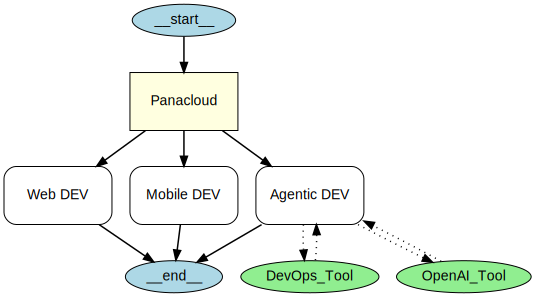

In [48]:
from agents.extensions.visualization import draw_graph
draw_graph(panacloud)